*Частина 1. CNN*






x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 0 T-shirt/top


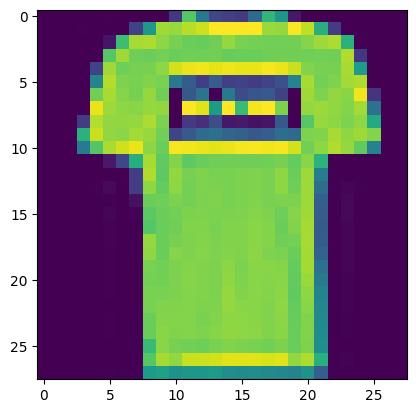

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')
fashion_mnist_labels = ["T-shirt/top",  #  0
                        "Trouser",      #  1
                        "Pullover",     #  2
                        "Dress",        #  3
                        "Coat",         #  4
                        "Sandal",       #  5
                        "Shirt",        #  6
                        "Sneaker",      #  7
                        "Bag",          #  8
                        "Ankle boot"]   #  9

img_index = 1
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# 5000 в валідаційний сет, решта 55,000 в тренувальний
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# (28, 28) -> (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

55000 train set
5000 validation set
10000 test set


In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.6077 - accuracy: 0.7762
Epoch 1: val_loss improved from inf to 0.39083, saving model to model.weights.best.hdf5
860/860 [==============================] - 43s 49ms/step - loss: 0.6077 - accuracy: 0.7762 - val_loss: 0.3908 - val_accuracy: 0.8612
Epoch 2/10
  3/860 [..............................] - ETA: 37s - loss: 0.4835 - accuracy: 0.7969

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


859/860 [============================>.] - ETA: 0s - loss: 0.4211 - accuracy: 0.8468
Epoch 2: val_loss improved from 0.39083 to 0.33359, saving model to model.weights.best.hdf5
860/860 [==============================] - 37s 43ms/step - loss: 0.4211 - accuracy: 0.8468 - val_loss: 0.3336 - val_accuracy: 0.8814
Epoch 3/10
860/860 [==============================] - ETA: 0s - loss: 0.3738 - accuracy: 0.8654
Epoch 3: val_loss improved from 0.33359 to 0.30012, saving model to model.weights.best.hdf5
860/860 [==============================] - 38s 44ms/step - loss: 0.3738 - accuracy: 0.8654 - val_loss: 0.3001 - val_accuracy: 0.8912
Epoch 4/10
860/860 [==============================] - ETA: 0s - loss: 0.3460 - accuracy: 0.8736
Epoch 4: val_loss improved from 0.30012 to 0.27658, saving model to model.weights.best.hdf5
860/860 [==============================] - 37s 43ms/step - loss: 0.3460 - accuracy: 0.8736 - val_loss: 0.2766 - val_accuracy: 0.9006
Epoch 5/10
860/860 [============================

In [ ]:
model.load_weights('model.weights.best.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9110999703407288


313/313 [==============================] - 2s 5ms/step


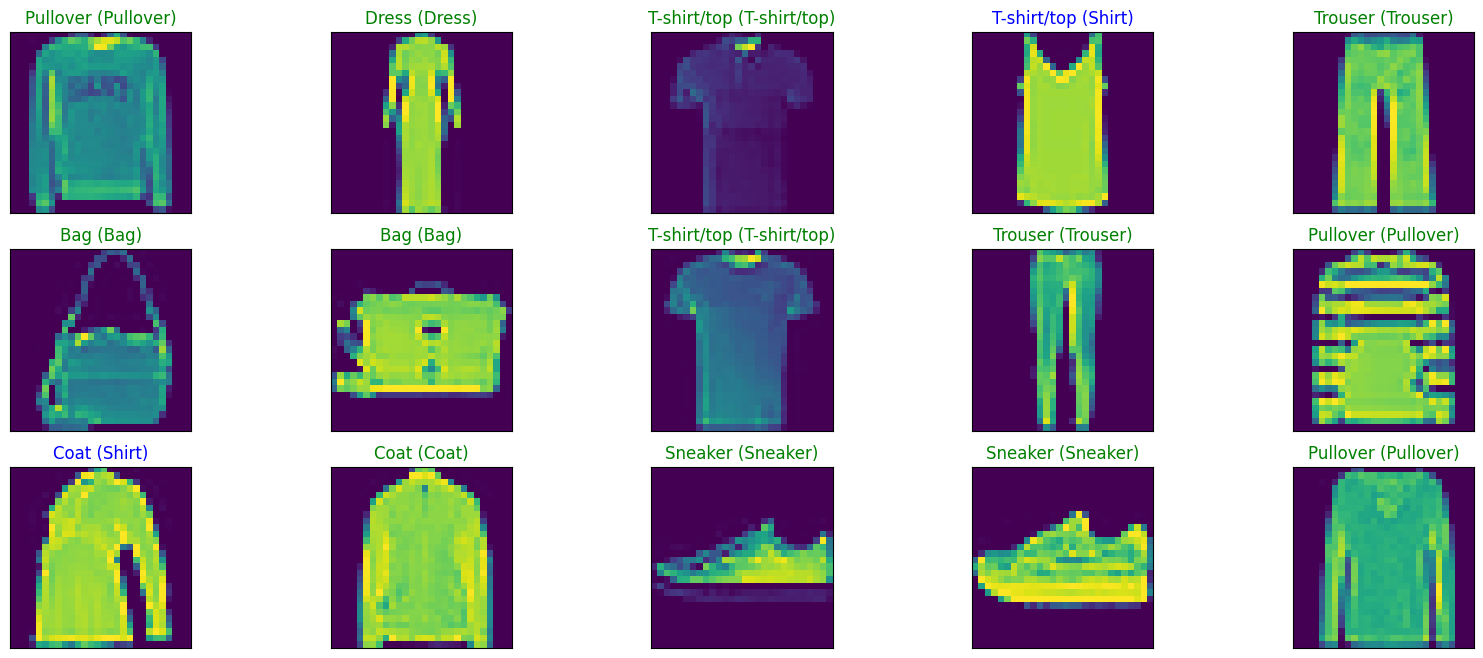

In [ ]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])

    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "blue"))

*Частина 2. VGG16 в якості згорткової основи*

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = tf.expand_dims(x_train, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)

x_train_resized = tf.image.resize_with_pad(x_train, target_height=32, target_width=32)
x_train_resized = tf.concat([x_train_resized, x_train_resized, x_train_resized], axis=-1)

x_test_resized = tf.image.resize_with_pad(x_test, target_height=32, target_width=32)
x_test_resized = tf.concat([x_test_resized, x_test_resized, x_test_resized], axis=-1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = Flatten()(vgg_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg_base.input, outputs=predictions)

for layer in vgg_base.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


checkpointer = ModelCheckpoint(filepath='vgg_fashion_mnist.hdf5', verbose=1, save_best_only=True)

model.fit(x_train_resized, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2,
          callbacks=[checkpointer])


Epoch 1/10
750/750 [==============================] - ETA: 0s - loss: 0.6747 - accuracy: 0.7624
Epoch 1: val_loss improved from inf to 0.48184, saving model to vgg_fashion_mnist.hdf5
750/750 [==============================] - 498s 664ms/step - loss: 0.6747 - accuracy: 0.7624 - val_loss: 0.4818 - val_accuracy: 0.8267
Epoch 2/10
750/750 [==============================] - ETA: 0s - loss: 0.4849 - accuracy: 0.8264
Epoch 2: val_loss improved from 0.48184 to 0.42725, saving model to vgg_fashion_mnist.hdf5
750/750 [==============================] - 442s 589ms/step - loss: 0.4849 - accuracy: 0.8264 - val_loss: 0.4273 - val_accuracy: 0.8411
Epoch 3/10
750/750 [==============================] - ETA: 0s - loss: 0.4438 - accuracy: 0.8401
Epoch 3: val_loss improved from 0.42725 to 0.41078, saving model to vgg_fashion_mnist.hdf5
750/750 [==============================] - 442s 590ms/step - loss: 0.4438 - accuracy: 0.8401 - val_loss: 0.4108 - val_accuracy: 0.8477
Epoch 4/10
750/750 [==================

In [ ]:
model.load_weights('vgg_fashion_mnist.hdf5')

score = model.evaluate(x_test_resized, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8690000176429749


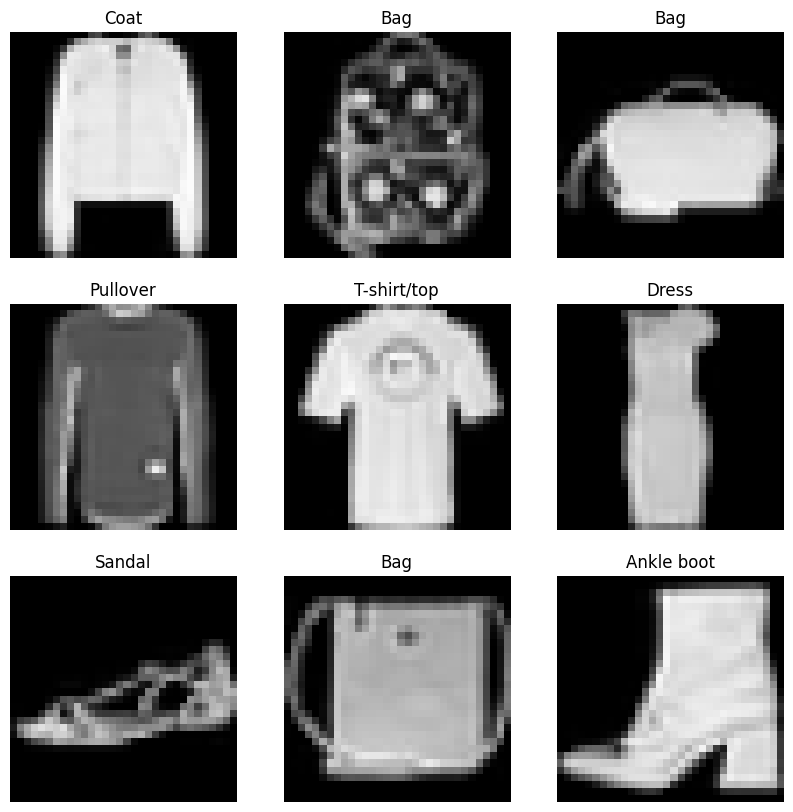

In [35]:
from random import randint
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    j = randint(0, 60000)
    plt.imshow(x_train_resized[j,])
    plt.title(fashion_mnist_labels[y_train[j,]])
    plt.axis("off")